<a href="https://colab.research.google.com/github/Himanshu-Singh11/Colab/blob/main/MOVIE%20RATING%20PREDICTION%20WITH%20PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Evaluation Metrics:

Mean Absolute Error (MAE): 0.97
Mean Squared Error (MSE): 1.57
R² Score: 0.15

Sample Comparison of Ratings:
results_df




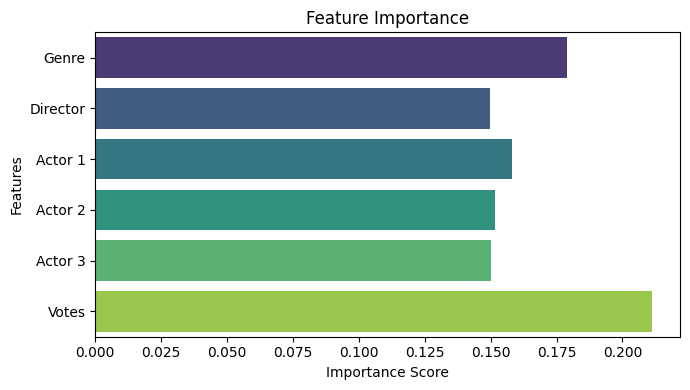

In [4]:
#MOVIE RATING PREDICTION WITH PYTHON

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")

required_columns = ['Rating', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
df_clean = df.dropna(subset=required_columns).copy()

df_clean['Votes'] = df_clean['Votes'].str.replace(',', '', regex=False)
df_clean['Votes'] = pd.to_numeric(df_clean['Votes'], errors='coerce')
df_clean['Votes'] = df_clean['Votes'].fillna(df_clean['Votes'].median())

X = df_clean[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']].copy()
y = df_clean['Rating']

label_encoders = {}
for column in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n\033[1mEvaluation Metrics:\033[0m\n")
print(f"\033[1mMean Absolute Error (MAE):\033[0m {mae:.2f}")
print(f"\033[1mMean Squared Error (MSE):\033[0m {mse:.2f}")
print(f"\033[1mR² Score:\033[0m {r2:.2f}")

print("\n\033[1mSample Comparison of Ratings:\033[0m")
print("results_df")
print("\n")

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7, 4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()